# **Clasificador de bosques aleatorios**



Una de las **desventajas** de los **árboles de decisión** es que son vulnerables a **sobreajustarse**, es decir, poder clasificar muy bien los datos de entrenamiento, pero muy malos resultados para clasificar datos nuevos. Además, muestra gran **variación** en sus resultados.

Para superar esa dificultad, el **clasificador de bosques aleatorios** crea cientos de **árboles de decisión** entrenandolos con muestras diferentes de las observaciones, y finalmente se promedian las predicciones de cada árbol individual. Por eso se conoce como un método de **ensamble**. Esto aumenta la precisión predictiva de los bosques aleatorios en comparación con un sólo árbol de decisión. Además tiene la ventaja que los árboles construidos son más pequeños, que el árbol construido con todos los datos de entrenamiento.





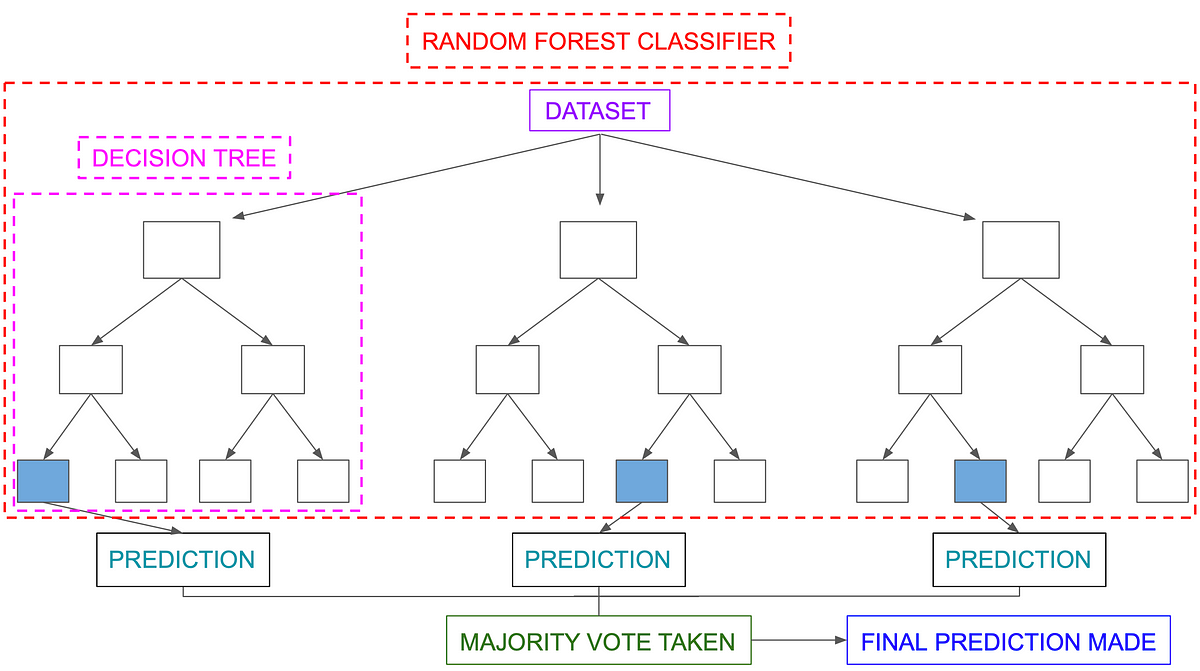


Un modelo ***Random Fores*** está compuesto por un conjunto (***ensemble***) de árboles de decisión individuales. Cada uno de estos árboles es entrenado con una **muestra aleatoria** extraída de los datos de entrenamiento originales mediante ***remuestreo (bootstrapping)***. Esto implica que cada árbol se entrena con un conjunto de datos ligeramente diferente.

La **predicción** de una nueva observación se obtiene al **agregar las predicciones** de todos los árboles individuales que conforman el modelo.


## **Ensambles**


> Por lo general, los árboles pequeños, con pocas ramificaciones, tienden a tener **poca varianza** pero pueden no captar de manera precisa la relación entre las variables, lo que se traduce en un **alto sesgo**.

>Por otro lado, los árboles grandes se ajustan mucho a los datos de entrenamiento, lo que **reduce el sesgo** pero **incrementa la varianza**. Una forma de solucionar este problema son los métodos de***ensemble***.

El término **sesgo** refiere a las desviaciones de las predicciones en promedio, respecto a sus etiquetas reales. Esto refleja la habilidad del modelo para capturar la verdadera relación entre las características y las clases.

La **varianza** hace referencia a como cambia el ajuste del el modelo en función de los datos utilizados en su entrenamiento.

Los métodos de ***ensemble*** combinan múltiples modelos en uno nuevo con el objetivo de lograr un equilibro entre sesgo y la varianza, logrando mejores predicciones que los modelos individuales originales.


Dos de los tipos de ensemble más utilizados son:

* ***Bagging*** (diminutivo de ***boostrap aggregation***): Se ajustan múltiples modelos, cada uno con un **subconjunto distinto** de los datos de entrenamiento. Para predecir, todos los modelos que forman el agregado participan aportando su predicción. Como valor final, se toma la clase más frecuente. Los modelos **Random Forest** están dentro de esta categoría.

* **Boosting**: Se ajustan **secuencialmente** múltiples modelos sencillos, llamados ***weak learners***, de forma que cada modelo aprende de los errores del anterior. Como valor final, al igual que en bagging, se toma la clase más frecuente (variables cualitativas). Tres de los métodos de boosting más empleados son **AdaBoost**, **Gradient Boosting** y **Stochastic Gradient Boosting**.

Aunque el objetivo final es el mismo, lograr un balance óptimo entre **sesgo** y **varianza**, existen dos diferencias importantes:

* Forma en que consiguen **reducir el error total**. El error total se puede escomponer como
$$sesgo + varianza + \epsilon$$
  * En ***bagging***, se emplean modelos con muy poco sesgo  pero mucha varianza, agregándolos se consigue **reducir la varianza** sin apenas aumentar el sesgo.
  * En ***boosting***, se emplean modelos con muy poca varianza pero mucho sesgo, ajustando secuencialmente los modelos se **reduce el sesgo**.

Forma en que se introducen variaciones en los modelos que forman el **ensamble**.
  * En ***bagging***, cada modelo es distinto del resto porque cada uno se entrena con una muestra distinta obtenida mediante ***bootstrapping***.
  * En ***boosting***, los modelos se ajustan secuencialmente y la **importancia (peso)** de las observaciones va cambiando en cada iteración, dando lugar a diferentes ajustes.

## **Algoritmo**

1. Dividir aleatoriamente los datos de entrenamiento en $k$ muestras.
2. Con cada muestra, entrenar un árbol de decisión.
3. Dado un patrón desconocido $x$, la clase asignada por el bosque aleatorio corresponderá de un *ensamble* de la clasificación de los árboles que lo componen.

El ensamble puede realizarse simplemente como la clase a la cual la mayoría de los árboles asginen a $x$ (*mayoría de votos*). Otra opción es promediar la predicción probabilística de cada clase en cada árbol aleatorio (esté es el método usado en sklearn).

## **Ventajas**

* Es un algoritmo intuitivo.
* Reduce el sobreajuste y la variabilidad de los árboles de decisión.
* Pueden aplicarse a problemas de regresión y clasificación.


## **Desventajas**

* Puede ser ineficaz cuando el número de árboles y de datos es muy grande.
* Tiene algunos parámetros que interactúan e influyen en el comportamiento del algoritmo  (número de iteraciones, profundidad del árbol).
* La combinación de múltiples árboles reducen la capacidad de interpretación en comparación con modelos basados en un sólo árbol.

# **Out-of-bag error**

Dada la naturaleza del proceso de ***bagging***, resulta posible estimar el **error de prueba** sin necesidad de recurrir a **métodos de validación cruzada (*cross-validation*)**. El hecho de que los árboles se ajusten empleando muestras generadas por ***bootstrapping*** conlleva que, en promedio, cada ajuste use solo aproximadamente dos tercios de las observaciones originales. Al tercio restante se le llama ***out-of-bag (OOB)***.

Si para cada árbol ajustado en el proceso de *bagging* se registran las observaciones empleadas, se puede predecir la respuesta de la observación
$i$ haciendo uso de aquellos árboles en los que esa observación ha sido **excluida** y obteniendo su moda.

Siguiendo este proceso, se pueden obtener las predicciones para las  $n$ observaciones y con ellas calcular el ***OOB-classification error**. Como la variable respuesta de cada observación se predice empleando únicamente los árboles en cuyo ajuste no participó dicha observación, el **OOB-error** sirve como estimación del **error de prueba**.

Esta es una **ventaja** añadida de los métodos de *bagging*, y por lo tanto de **Random Forest** ya que evita tener que recurrir al proceso de validación cruzada (computacionalmente costoso) para la **optimización de los hiperparámetros**.

# **RandomForestClassifier()**

```
from sklearn.ensemble import  RandomForestClassifier
RandomForestClassifier(n_estimators=100,
                       criterion='gini',
                       boostrap=True,
                       oob_score=False,
                       max_depth = None,
                       min_samples_split=2,
                       min_samples_leaf=1,
                       max_features=None,
                       n_jobs=1)
```



Los parámetros más importantes son:

* ```n_estimators``` Número de árboles de decisión creados
* ```boostrap```     Cuando es True usa técnicas boostrap para generar las muestras. Si es False utiliza todos los datos de entrenamiento para cada árbol.
* ```n_jobs``` Define el número de tareas realizadas en paralelo.
* ```oob_score``` Establece si deben usar muestras *out-of-bag* para estimar el *score* de generalización. Por defecto, usará ```accuracy_score```.
* ```criterion```. Función para medir la calidad de la división. Las funciones soportadas son:
  * "gini"
  * "entropy"
  * "log_loss"

Los demás parámetros los hereda de la clase ```DecisionTreeClassifier()```, controlando las propiedades de cada árbol del bosque: ```max_depth```, ```min_samples_split```, ```min_samples_leaf```, ```max_features```.

## **Ejemplo**

In [9]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [10]:
# Importar datos
from sklearn.datasets import load_iris
data = load_iris()
X = data["data"][:,0:2]
y = data["target"]
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=.2,
                                                    random_state=1)

In [11]:
clfs = {"Decision Tree":  DecisionTreeClassifier(),
        "Random Forest": RandomForestClassifier(n_estimators=200)}

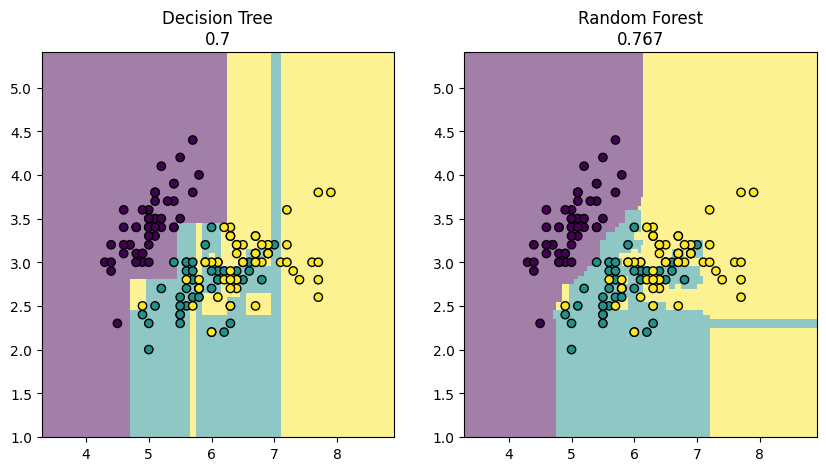

In [12]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
i=0
for name, clf in clfs.items():
  clf.fit(X_train, y_train)
  display = DecisionBoundaryDisplay.from_estimator(clf, X,
                                                    response_method="predict",
                                                    alpha=0.5, ax=ax[i],
                                                    grid_resolution=500,
                                                    plot_method="pcolormesh")
  display.ax_.scatter(X[:, 0], X[:, 1], c=y, edgecolor="k")
  y_pred = clf.predict(X_test)
  accuracy = np.round(metrics.accuracy_score(y_test, y_pred), 3)
  display.ax_.set_title(name+"\n"+str(accuracy))
  i += 1

### Graficar los árboles de decisión de un bosque aleatorio

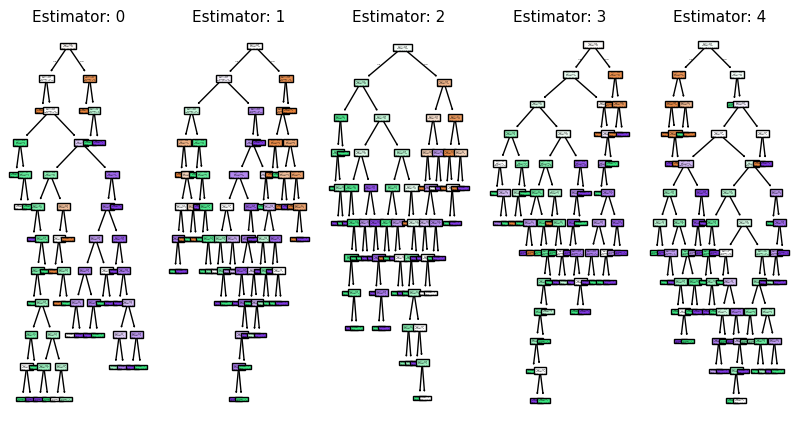

In [13]:
from sklearn.tree import plot_tree
forest = RandomForestClassifier(n_estimators=5)
forest.fit(X, y)
fig, axes = plt.subplots(1, 5, figsize = (10, 5))
for i in range(0, 5):
    plot_tree(forest.estimators_[i],
                   filled = True,
                   ax = axes[i])
    axes[i].set_title('Estimator: ' + str(i), fontsize = 11)

### ¿Cuantos árboles debe tener el bosque aleatorio?

In [34]:
accuracy_mean = []
accuracy_std = []
range_ = np.arange(1, 501, 50)
repetitions = 10
for i in range_:
  acc = []
  for _ in range(repetitions):
      clf = RandomForestClassifier(n_estimators=i, n_jobs=4).fit(X_train, y_train)
      y_pred = clf.predict(X_test)
      acc.append(metrics.accuracy_score(y_test, y_pred))
  accuracy_mean.append(np.mean(acc))
  accuracy_std.append(np.std(acc))

In [15]:
tree = DecisionTreeClassifier().fit(X_train, y_train)
y_pred = tree.predict(X_test)
accuracy_tree = metrics.accuracy_score(y_test, y_pred)

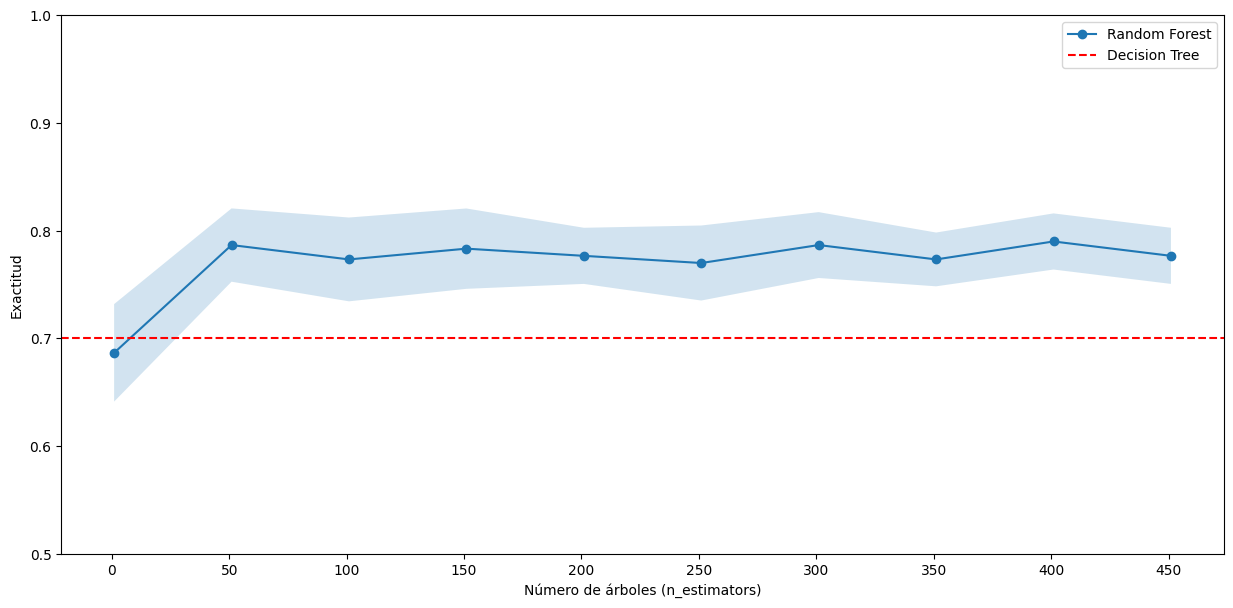

In [37]:
fig, ax = plt.subplots(figsize=(15, 7))
ax.plot(range_, accuracy_mean, label="Random Forest", marker='o')
ax.fill_between(range_,
                np.array(accuracy_mean) - np.array(accuracy_std),
                np.array(accuracy_mean) + np.array(accuracy_std),
                alpha=0.2)
ax.axhline(accuracy_tree, label="Decision Tree", color="red", linestyle='--')
ax.legend()
ax.set_ylim(0.5, 1)
ax.set_xticks(np.arange(0, 451, 50))
ax.set_xlabel("Número de árboles (n_estimators)")
ax.set_ylabel("Exactitud")
plt.show()

Clasificación de dígitos

In [25]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

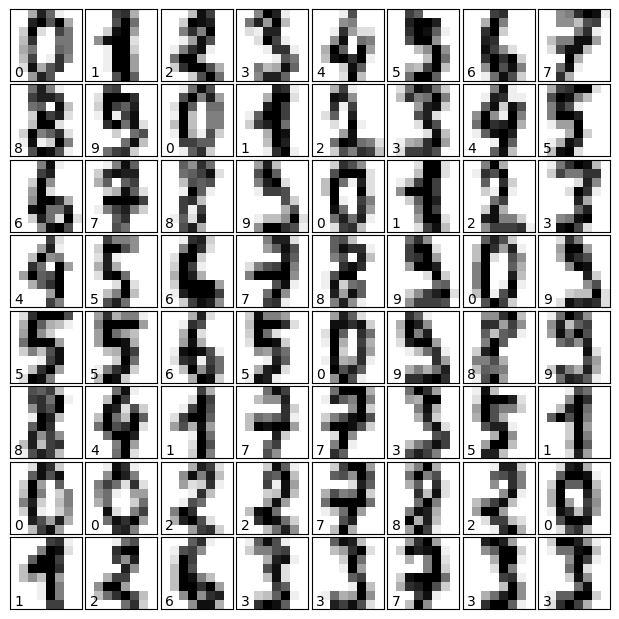

In [18]:
# set up the figure
fig = plt.figure(figsize=(6, 6))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# plot the digits: each image is 8x8 pixels
for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(digits.images[i], cmap=plt.cm.binary, interpolation='nearest')

    # label the image with the target value
    ax.text(0, 7, str(digits.target[i]))

In [19]:
Xtrain, Xtest, ytrain, ytest = train_test_split(digits.data, digits.target,
                                                random_state=0)
model = RandomForestClassifier(n_estimators=1000)
model.fit(Xtrain, ytrain)
ypred = model.predict(Xtest)

In [20]:
print(metrics.classification_report(ypred, ytest))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99        38
           1       1.00      0.96      0.98        45
           2       0.95      1.00      0.98        42
           3       0.98      0.98      0.98        45
           4       0.97      1.00      0.99        37
           5       0.98      0.98      0.98        48
           6       0.98      1.00      0.99        51
           7       1.00      0.96      0.98        50
           8       0.96      0.98      0.97        47
           9       0.98      0.98      0.98        47

    accuracy                           0.98       450
   macro avg       0.98      0.98      0.98       450
weighted avg       0.98      0.98      0.98       450



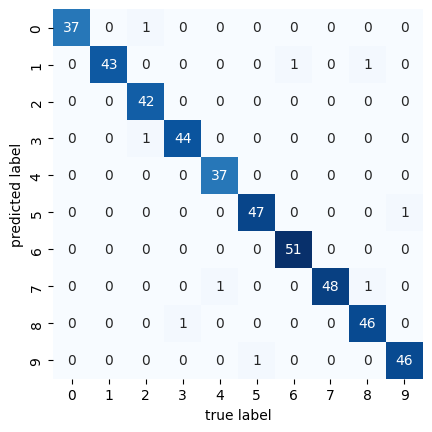

In [22]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
mat = confusion_matrix(ytest, ypred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d',
            cbar=False, cmap='Blues')
plt.xlabel('true label')
plt.ylabel('predicted label');

# **Referencias**

* Amat Rodrigo, J. (2024) *Random Forest con Python**
https://cienciadedatos.net/documentos/py08_random_forest_python#Ejemplo_clasificaci%C3%B3n